In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geocoder
import requests

In [24]:
#suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format 

In [5]:
booli_df=pd.read_csv('booli_clean.csv')

In [6]:
booli_df.tail()

Address                      Location    Price  Boolis_price  \
10864  Maskinistvägen 16      Bolinder Strand,Järfälla  4230000       4230000   
10865    Kungsklippan 12         Kungsholmen,Stockholm  4070000       4070000   
10866     Tallidsvägen 7                Finntorp,Nacka  3995000       3340000   
10867    Bråvallagatan 5  Vasastan Birkastan,Stockholm  4500000       4500000   
10868       Sveavägen 89            Vasastan,Stockholm  8950000       8950000   

       Floor  Balcony  Patio  Elevator  Size in m²  Total Rooms  Monthly Pay  \
10864    6.0     True  False      True        95.0          4.0       4727.0   
10865    4.0     True  False      True        40.0          2.0       4345.0   
10866    7.0     True  False      True        80.0          3.0       4906.0   
10867    1.0    False  False      True        43.0          1.0       2089.0   
10868    2.0     True  False      True        80.0          3.0       3200.0   

          Amt per m²            District Municipality  
10864   44526.315789     Bolinder Strand     Järfälla  
10865  101750.000000         Kungsholmen    Stockholm  
10866   49937.500000            Finntorp        Nacka  
10867  104651.162791  Vasastan Birkastan    Stockholm  
10868  111875.000000            Vasastan    Stockholm

In [3]:
hemnet_df=pd.read_excel('/Users/yonastena/Downloads/Housing/clean_listings.xlsx')

In [4]:
hemnet_df.tail()

Address                              Location    Price  \
2368       Morupsgränd 7     Östbergahöjden, Stockholms kommun  1895000   
2369    Torsgatan 5, 2tr  Vasastan Norrmalm, Stockholms kommun  6450000   
2370  Minnebergsvägen 14          Traneberg, Stockholms kommun  2695000   
2371     Mjölnarvägen 24             Kvarnholmen, Nacka kommun  6995000   
2372    Ulvsättragränd 7             Kallhäll, Järfälla kommun  1895000   

      Size in m²  Total Rooms  Floor  Amt per m²  Monthly Pay  \
2368        57.0          2.0    0.0       33246         3850   
2369        76.0          3.0    2.0       84868         4251   
2370        43.0          2.0    0.0       62674         3407   
2371       106.0          3.0    2.0       65991         5440   
2372        47.5          2.0    5.0       39895         3802   

                      Feature Floor Number  Total Floors  Balcony  Patio  \
2368  PlusBalkongUteplatsHiss            0           3.0     True   True   
2369          PlusBalkongHiss            2           7.0     True  False   
2370             PlusUteplats            0           3.0    False   True   
2371                 PlusHiss            2           NaN    False  False   
2372              BalkongHiss            5           5.0     True  False   

      Elevator  New Construction           District       Municipality  
2368      True             False     Östbergahöjden  Stockholms kommun  
2369      True             False  Vasastan Norrmalm  Stockholms kommun  
2370     False             False          Traneberg  Stockholms kommun  
2371      True             False        Kvarnholmen       Nacka kommun  
2372      True             False           Kallhäll    Järfälla kommun

In [42]:
full_df=pd.concat([booli_df, hemnet_df], axis=0, ignore_index=True, join='inner')
full_df.shape

(13242, 13)

In [44]:
len(full_df[full_df.duplicated()])

7

### check for missing values

In [45]:
full_df.isna().sum()

Address         0
Location        0
Price           0
Floor           0
Balcony         0
Patio           0
Elevator        0
Size in m²      0
Total Rooms     0
Monthly Pay     0
Amt per m²      0
District        0
Municipality    0
dtype: int64

There was no missing values

### check for duplicates

In [46]:
full_df[full_df.duplicated()]

Address                            Location    Price  \
1966          Karlavägen 29A                      Hersby,Lidingö  2310000   
3512       Sturebergsvägen 5                    Vendelsö,Haninge  2180000   
4784      Kratsbodavägen 44D                    Bromma,Stockholm  3490000   
5362   Sankt Göransgatan 153               Kungsholmen,Stockholm  2350000   
7879        Lenngrensgatan 2         Hornsbergs Strand,Stockholm  8740000   
11669             Ekerövägen             Träkvista, Ekerö kommun  4795000   
11712      Marieviksgatan 44  Liljeholmskajen, Stockholms kommun  5595000   

       Floor  Balcony  Patio  Elevator  Size in m²  Total Rooms  Monthly Pay  \
1966    1.00    False   True      True       39.00         1.00      2640.00   
3512    2.00     True  False     False       72.00         3.00      4622.00   
4784    1.00     True  False      True       55.00         2.00      3350.00   
5362    5.00    False  False      True       22.50         1.00      1364.00   
7879    2.00     True  False      True      100.50         4.00      4286.00   
11669   0.00     True  False      True       80.00         3.00      6455.00   
11712   1.00     True  False      True       84.00         3.00      4491.00   

       Amt per m²           District       Municipality  
1966     59230.77             Hersby            Lidingö  
3512     30277.78           Vendelsö            Haninge  
4784     63454.55             Bromma          Stockholm  
5362    104444.44        Kungsholmen          Stockholm  
7879     86965.17  Hornsbergs Strand          Stockholm  
11669    59938.00          Träkvista       Ekerö kommun  
11712    66607.00    Liljeholmskajen  Stockholms kommun

There were 7 duplicated entries that need to beremoved.

In [47]:
full_df=full_df.drop_duplicates(ignore_index=True)

In [50]:
full_df.Municipality.unique()

array(['Sollentuna', 'Järfälla', 'Stockholm', 'Södertälje', 'Botkyrka',
       'Haninge', 'Nacka', 'Solna', 'Tyresö', 'Upplands Väsby',
       'Vallentuna', 'Täby', 'Huddinge', 'Lidingö', 'Upplands-Bro',
       'Sundbyberg', 'Norrtälje', 'Sigtuna', 'Värmdö', 'Salem',
       'Österåker', 'Danderyd', 'Nynäshamn', 'Nykvarn', 'Vaxholm',
       'Ekerö', 'Stockholms kommun', 'Järfälla kommun',
       'Sundbybergs kommun', 'Sollentuna kommun', 'Huddinge kommun',
       'Nacka kommun', 'Upplands Väsby kommun', 'Norrtälje kommun',
       'Haninge kommun', 'Värmdö kommun', 'Upplands-Bro kommun',
       'Täby kommun', 'Södertälje kommun', 'Nynäshamns kommun',
       'Botkyrka kommun', 'Tyresö kommun', 'Sigtuna kommun',
       'Solna kommun', 'Österåkers kommun', 'Salems kommun',
       'Vallentuna kommun', 'Danderyds kommun', 'Vaxholms kommun',
       'Ekerö kommun', 'Nykvarns kommun', 'Lidingö kommun'], dtype=object)

In [51]:
def ensure_kommun_suffix(kommun):
    if not kommun.endswith('kommun'):
        return kommun + ' kommun'
    return kommun

# Apply the function to the municipality column
full_df['Municipality'] = full_df['Municipality'].apply(ensure_kommun_suffix)

In [52]:
full_df.Municipality.unique()

array(['Sollentuna kommun', 'Järfälla kommun', 'Stockholm kommun',
       'Södertälje kommun', 'Botkyrka kommun', 'Haninge kommun',
       'Nacka kommun', 'Solna kommun', 'Tyresö kommun',
       'Upplands Väsby kommun', 'Vallentuna kommun', 'Täby kommun',
       'Huddinge kommun', 'Lidingö kommun', 'Upplands-Bro kommun',
       'Sundbyberg kommun', 'Norrtälje kommun', 'Sigtuna kommun',
       'Värmdö kommun', 'Salem kommun', 'Österåker kommun',
       'Danderyd kommun', 'Nynäshamn kommun', 'Nykvarn kommun',
       'Vaxholm kommun', 'Ekerö kommun', 'Stockholms kommun',
       'Sundbybergs kommun', 'Nynäshamns kommun', 'Österåkers kommun',
       'Salems kommun', 'Danderyds kommun', 'Vaxholms kommun',
       'Nykvarns kommun'], dtype=object)

In [61]:
#some of the kommuns were inconsistently recorded.
corrections = {'Stockholm kommun': 'Stockholms kommun', 'Sundbyberg kommun': 'Sundbybergs kommun',
               'Salem kommun':'Salems kommun','Österåker kommun':' Österåkers kommun',
               'Nykvarn kommun':'Nykvarns kommun','Danderyd kommun':'Danderyds kommun',
               'Nynäshamn kommun':'Nynäshamns kommun','Vaxholm kommun':'Vaxholms kommun',
               ' Österåkers kommun':'Österåkers kommun'}

full_df['Municipality']=full_df['Municipality'].replace(corrections)

In [62]:
full_df.Municipality.value_counts()

Municipality
Stockholms kommun        5952
Solna kommun              924
Nacka kommun              772
Järfälla kommun           655
Sundbybergs kommun        639
Haninge kommun            553
Huddinge kommun           495
Täby kommun               470
Botkyrka kommun           343
Upplands Väsby kommun     326
Sollentuna kommun         288
Sigtuna kommun            263
Södertälje kommun         254
Norrtälje kommun          214
Tyresö kommun             182
Upplands-Bro kommun       163
Lidingö kommun            154
Värmdö kommun             128
Österåkers kommun         115
Danderyds kommun           96
Nynäshamns kommun          81
Vaxholms kommun            58
Vallentuna kommun          55
Salems kommun              32
Nykvarns kommun            12
Ekerö kommun               11
Name: count, dtype: int64

In [194]:
full_df.groupby('Municipality')[['Amt per m²','Price']].mean().sort_values(by='Amt per m²',ascending=False)[:3]

Amt per m²      Price
Municipality                            
Stockholms kommun    75785.24 4506162.65
Danderyds kommun     65157.50 4211197.92
Lidingö kommun       64506.36 4570974.03

As expected the three municipalities with the highest Price per m² were located in Stockholm, Danderyds,Lidingö. The five most expensive areas in Stockholm on Price per m² were

In [66]:
full_df.groupby(['District','Municipality'])['Amt per m²'].mean().sort_values(ascending=False).head()

District                        Municipality     
Kungsholmen S:t Eriksområdet    Stockholms kommun   157632.00
Kungsholmen Sankt Eriksområdet  Stockholms kommun   157631.58
Nedre Östermalm                 Stockholms kommun   139617.12
Kevinge Strand                  Danderyds kommun    139014.33
Östermalm                       Stockholms kommun   131509.71
Name: Amt per m², dtype: float64

The most affordable house price per m² were in

In [67]:
full_df.groupby(['District','Municipality'])['Amt per m²'].mean().sort_values(ascending=False).tail()

District         Municipality     
Hovsjö           Södertälje kommun   13262.91
Älmsta centralt  Norrtälje kommun    13250.00
Älmsta           Norrtälje kommun    13026.32
Kusby            Norrtälje kommun    11648.76
Hallstavik       Norrtälje kommun    11109.86
Name: Amt per m², dtype: float64

<Axes: title={'center': 'Mean Price in SEK'}, xlabel='Municipality'>

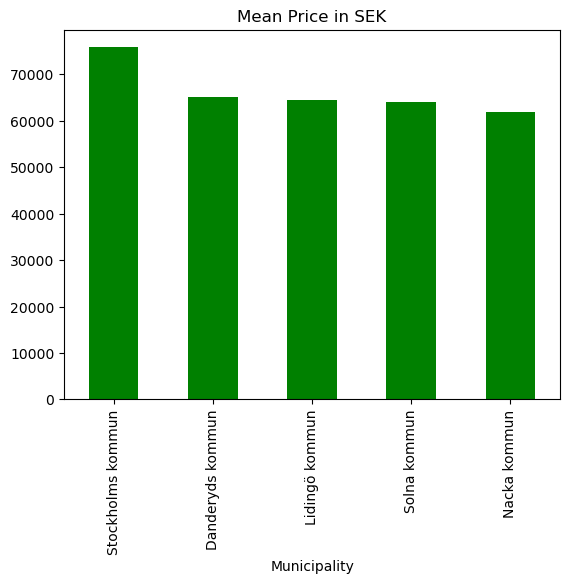

In [87]:
full_df.groupby(['Municipality'])['Amt per m²'].mean().sort_values(ascending=False).head().plot(title= 'Mean Price in SEK', kind='bar', color = 'green')

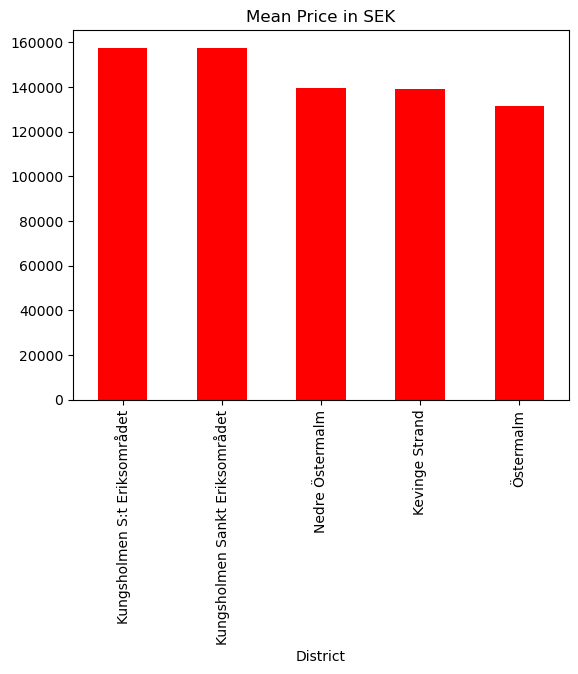

In [88]:
plt.ticklabel_format(style='plain')
full_df.groupby(['District'])['Amt per m²'].mean().sort_values(ascending=False).head().plot(title= 'Mean Price in SEK', kind='bar', color = 'red')
plt.show()

In [84]:
def detect_outliers(df):
  cols = list(df)
  outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
  for column in cols:
    if column in df.select_dtypes(include=np.number).columns:
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      iqr = q3 - q1
      fence_low = q1 - (1.5*iqr)
      fence_high = q3 + (1.5*iqr)
      outliers = pd.concat([outliers, pd.DataFrame({'Feature': [column], 'Number of Outliers': [df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]]})], ignore_index=True)
  return outliers

detect_outliers(full_df)

Feature Number of Outliers
0        Price                768
1        Floor                158
2   Size in m²                130
3  Total Rooms                394
4  Monthly Pay                150
5   Amt per m²                168

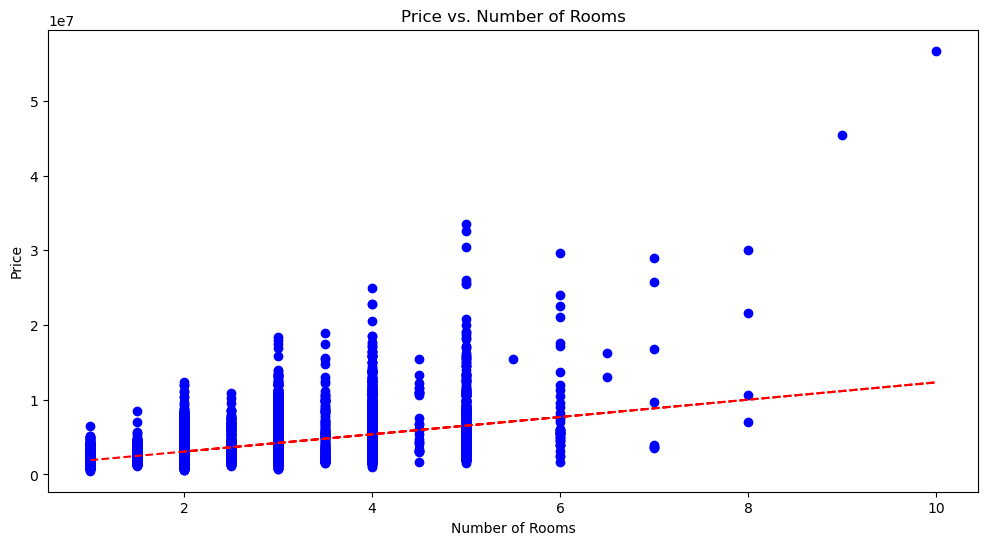

In [86]:
plt.figure(figsize=(12, 6))
plt.scatter(full_df['Total Rooms'], full_df['Price'], c='blue', label='Total Rooms')
z = np.polyfit(full_df['Total Rooms'], full_df['Price'], 1)
p = np.poly1d(z)
plt.plot(full_df['Total Rooms'], p(full_df['Total Rooms']), "r--")
plt.title('Price vs. Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show();

In [91]:
#To effectively retrieve latitude and longitude for addresses  
import time
from geopy.geocoders import Nominatim
from collections import defaultdict

# Initialize geolocator with a user agent
geolocator = Nominatim(user_agent='My_app')

# Initialize lists to store results and cache 
lat_arr = []
long_arr = []

# Use defaultdict with a lambda function for efficient caching
cache = defaultdict(lambda: ('n/a', 'n/a'))

# Function to get latitude and longitude with caching
def get_lat_long(address):
    if address in cache:
        return cache[address]
    
    try:
        location = geolocator.geocode(address)
        if location:
            lat_long = (location.latitude, location.longitude)
        else:
            lat_long = ('n/a', 'n/a') # Address not found
    except Exception as e:
        lat_long = ('n/a', 'n/a') # Handle other errors
    
    cache[address] = lat_long
    return lat_long

# Process each address in the 'Address' column of 'apart' DataFrame
for addr in full_df['Address']:
    lat, lon = get_lat_long(addr)
    lat_arr.append(lat)
    long_arr.append(lon)
    time.sleep(1)  # Introduce a delay to respect the rate limit

# Insert the latitude and longitude columns into the dataframe
full_df.insert(loc=1, column='lat', value=lat_arr)
full_df.insert(loc=2, column='long', value=long_arr)
print(full_df.head())

               Address   lat  long              Location    Price  Floor  \
0         Lindvägen 4G 57.61 12.79  Norrviken,Sollentuna  1895000   1.00   
1       Idunslingan 29 59.40 17.84       Skälby,Järfälla  3495000   4.00   
2  Knypplerskevägen 12 59.34 17.93      Bromma,Stockholm  2250000   2.00   
3     Nysättravägen 19 59.21 18.05  Brunnsäng,Södertälje  1850000   9.00   
4      Lagmansbacken 7 59.24 17.84         Alby,Botkyrka  1150000   1.00   

   Balcony  Patio  Elevator  Size in m²  Total Rooms  Monthly Pay  Amt per m²  \
0    False   True     False       34.00         1.00      2613.00    55735.29   
1     True  False      True       75.00         3.00      4139.00    46600.00   
2    False  False     False       42.00         2.00      3937.00    53571.43   
3     True  False      True       78.50         3.00      5658.00    23566.88   
4     True  False      True       30.00         1.00      2663.00    38333.33   

    District       Municipality  
0  Norrviken  Sollentu

In [104]:
len(full_df[full_df['lat']=='n/a'])

503

In [97]:
missing_coordinates=full_df[full_df['lat']=='n/a']

In [99]:
def add_splt(addr):
    parts=addr.split(',',1)
    return parts[0]

missing_coordinates['Address']=missing_coordinates['Address'].apply(add_splt)

/var/folders/c0/2_qqtj554v7gc65n7_h0z90c0000gn/T/ipykernel_39090/753673478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_coordinates['Address']=missing_coordinates['Address'].apply(add_splt)


In [100]:
missing_coordinates['Address'].head(20)

247               Venngarn 294A
778               Siloplatsen 8
970            Blinkersgatan 19
1232            Huvustagatan 20
1238            Huvustagatan 20
1797            Huvustagatan 20
1811               Havslänken 3
1820          Gökholmsbacken 16
2124          Thunströms väg 20
2418          Thunströms väg 12
2544          Påskvippegatan 2A
2804          Östregårds väg 7F
3024    Ragvaldsbo Gårdsväg 10D
3096              Tibble Torg 7
3207               Venngarn 293
3257           Runstenstorget 4
3481     Nibble Skogsbrynsby 25
3632          Thunströms väg 12
4359       Zetterlundsslingan 6
4525              Venngarn 304L
Name: Address, dtype: object

In [102]:
# Initialize geolocator with a user agent
geolocator = Nominatim(user_agent='My_app')

# Initialize lists to store results and cache 
lat_arr = []
long_arr = []

# Use defaultdict with a lambda function for efficient caching
cache = defaultdict(lambda: ('n/a', 'n/a'))

# Function to get latitude and longitude with caching
def get_lat_long(address):
    if address in cache:
        return cache[address]
    
    try:
        location = geolocator.geocode(address)
        if location:
            lat_long = (location.latitude, location.longitude)
        else:
            lat_long = ('n/a', 'n/a') # Address not found
    except Exception as e:
        lat_long = ('n/a', 'n/a') # Handle other errors
    
    cache[address] = lat_long
    return lat_long

# Process each address in the 'Address' column of 'apart' DataFrame
for addr in missing_coordinates['Address']:
    lat, lon = get_lat_long(addr)
    lat_arr.append(lat)
    long_arr.append(lon)
    time.sleep(1)  # Introduce a delay to respect the rate limit

# Insert the latitude and longitude columns into the dataframe
missing_coordinates.insert(loc=1, column='LAT', value=lat_arr)
missing_coordinates.insert(loc=2, column='LONG', value=long_arr)
print(missing_coordinates.head())

               Address  LAT LONG  lat long                  Location    Price  \
247      Venngarn 294A  n/a  n/a  n/a  n/a  Sigtuna Wenngarn,Sigtuna  1020000   
778      Siloplatsen 8  n/a  n/a  n/a  n/a         Kvarnholmen,Nacka  3995000   
970   Blinkersgatan 19  n/a  n/a  n/a  n/a            Täby Park,Täby  4840000   
1232   Huvustagatan 20  n/a  n/a  n/a  n/a            Huvudsta,Solna  2250000   
1238   Huvustagatan 20  n/a  n/a  n/a  n/a            Huvudsta,Solna  3275000   

      Floor  Balcony  Patio  Elevator  Size in m²  Total Rooms  Monthly Pay  \
247    1.00    False   True     False       17.00         1.00      1452.00   
778    7.00     True  False      True       54.00         2.00      4844.00   
970    2.00     True  False      True       90.00         4.00      6329.00   
1232   2.00    False  False      True       34.00         1.00      5700.00   
1238   2.00     True  False      True       58.00         2.00      5700.00   

      Amt per m²          District    

In [105]:
len(missing_coordinates[missing_coordinates['LAT']=='n/a'])

136

In [107]:
toadd_coord=missing_coordinates[missing_coordinates['LAT']!='n/a']
toadd_coord.shape

(367, 17)

join the two datasets: full_df and toadd_coord

In [124]:
result_df=toadd_coord.combine_first(full_df)

In [125]:
# Combine latitude and longitude columns with efficient filling 
result_df['Latitude'] = result_df['LAT'].fillna(result_df.pop('lat'))
result_df['Longitude'] = result_df['LONG'].fillna(result_df.pop('long'))

In [131]:
len(result_df[result_df['Latitude']=='n/a'])

136

In [135]:
#remove the remaining missing coordinates
result_df=result_df[result_df['Latitude']!='n/a']
result_df=result_df.reset_index(drop=True)
result_df=result_df.drop(columns=['LAT','LONG'])
result_df.tail()

Address  Amt per m²  Balcony           District  Elevator  \
13094       Morupsgränd 7    33246.00     True     Östbergahöjden      True   
13095         Torsgatan 5    84868.00     True  Vasastan Norrmalm      True   
13096  Minnebergsvägen 14    62674.00    False          Traneberg     False   
13097     Mjölnarvägen 24    65991.00    False        Kvarnholmen      True   
13098    Ulvsättragränd 7    39895.00     True           Kallhäll      True   

       Floor                              Location  Monthly Pay  \
13094   0.00     Östbergahöjden, Stockholms kommun      3850.00   
13095   2.00  Vasastan Norrmalm, Stockholms kommun      4251.00   
13096   0.00          Traneberg, Stockholms kommun      3407.00   
13097   2.00             Kvarnholmen, Nacka kommun      5440.00   
13098   5.00             Kallhäll, Järfälla kommun      3802.00   

            Municipality  Patio    Price  Size in m²  Total Rooms Latitude  \
13094  Stockholms kommun   True  1895000       57.00         2.00    59.29   
13095  Stockholms kommun  False  6450000       76.00         3.00    59.34   
13096  Stockholms kommun   True  2695000       43.00         2.00    59.34   
13097       Nacka kommun  False  6995000      106.00         3.00    59.32   
13098    Järfälla kommun  False  1895000       47.50         2.00    59.46   

      Longitude  
13094     18.03  
13095     18.05  
13096     17.99  
13097     18.14  
13098     17.82

In [136]:
result_df.isna().sum()

Address         0
Amt per m²      0
Balcony         0
District        0
Elevator        0
Floor           0
Location        0
Monthly Pay     0
Municipality    0
Patio           0
Price           0
Size in m²      0
Total Rooms     0
Latitude        0
Longitude       0
dtype: int64

In [137]:
# Save the resulting dataframe as a csv file
result_df.to_csv('result_df.csv',index=False)

Check if the Latitude and Longitude values are with in Stockholm range

In [143]:
print('minimum latitude is: '+ str(result_df.Latitude.astype(float).min()))
print('maximum latitude is: '+ str(result_df.Latitude.astype(float).max()))
print('minimum longitude is: '+ str(result_df.Longitude.astype(float).min()))
print('minimum longitude is: '+ str(result_df.Longitude.astype(float).max()))

minimum latitude is: 55.089546
maximum latitude is: 67.8255305
minimum longitude is: 5.7184072
minimum longitude is: 26.4650799


Some Latitude and Longitude values are wrongly inserted and needs to be removed. Let's first change the datatype for the two columns for data manipulation

In [144]:
# Change the data type so that we can calculate distance of the coordinates from the city centre
result_df['Latitude']=result_df['Latitude'].astype(float)
result_df['Longitude']=result_df['Longitude'].astype(float)

In [197]:
#since some latitude and longitude values have been very different from the actual stockholm locations. we create a new dataframe based on the following range
result_df = result_df.query("Latitude >= 59 and Latitude < 59.6 and Longitude >= 17.2 and Longitude < 18.5").reset_index(drop=True)
result_df[['Latitude','Longitude']].describe()

Latitude  Longitude
count  10336.00   10336.00
mean      59.33      18.02
std        0.07       0.12
min       59.08      17.33
25%       59.29      17.96
50%       59.33      18.03
75%       59.36      18.09
max       59.59      18.50

### Feature Engineering

Create a distance column based on the coordinates of each apartments and the city centre.
For this project, Sergels Torg is used as the centre of the city / kilometer zero, its coordinates are:59.3324° N, 18.0645° E

In order to do that, Haversine formula was used. HAversine formula calculates distance between two points using the latitude and longitude of the two points. Formula for calculating distance is as follows:

a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)

c = 2 * atan2( √a, √(1−a) )

d = R * c

In [149]:
#For this analysis, Sergels Torg ,the public square is used as the centre of the city / kilometer zero, its coordinates are:

# Set constant lat_2 and long_2 values
result_df[['lat_2', 'long_2']] = 59.3324, 18.0645
# Earth's radius in kilometers
R = 6371.0
# Vectorized haversine formula
def dist_calculator(lat1, lon1, lat2, lon2):
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)
    
    d_lat = lat2_rad - lat1_rad
    d_lon = lon2_rad - lon1_rad
    
    a = np.sin(d_lat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(d_lon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c

# Calculate distances
result_df['Distance'] = dist_calculator(result_df['Latitude'], 
                                           result_df['Longitude'], 
                                           result_df['lat_2'], 
                                           result_df['long_2'])


In [198]:
result_df.Distance.describe()

count   10336.00
mean        8.98
std         6.67
min         0.16
25%         3.92
50%         7.02
75%        12.84
max        45.80
Name: Distance, dtype: float64

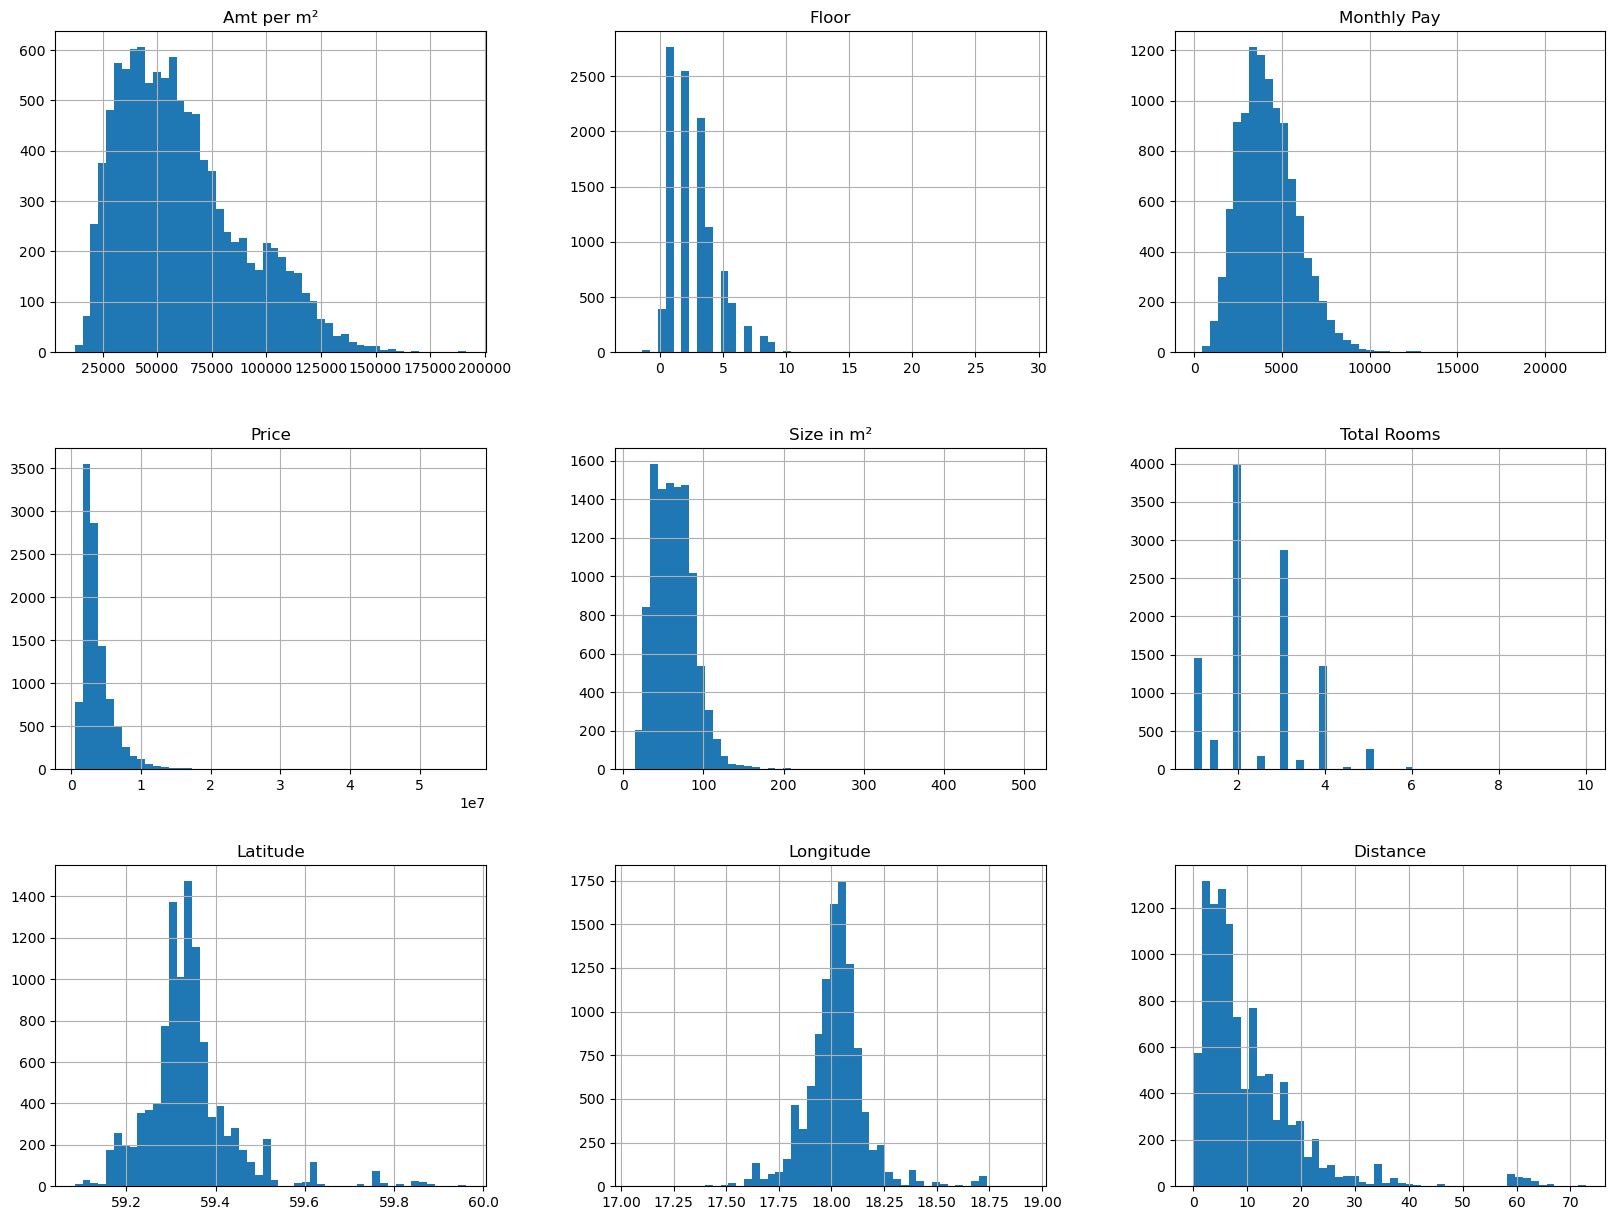

In [193]:
result_df.drop(['lat_2','long_2'],axis=1).hist(bins=50,figsize=(20,15))
plt.show()

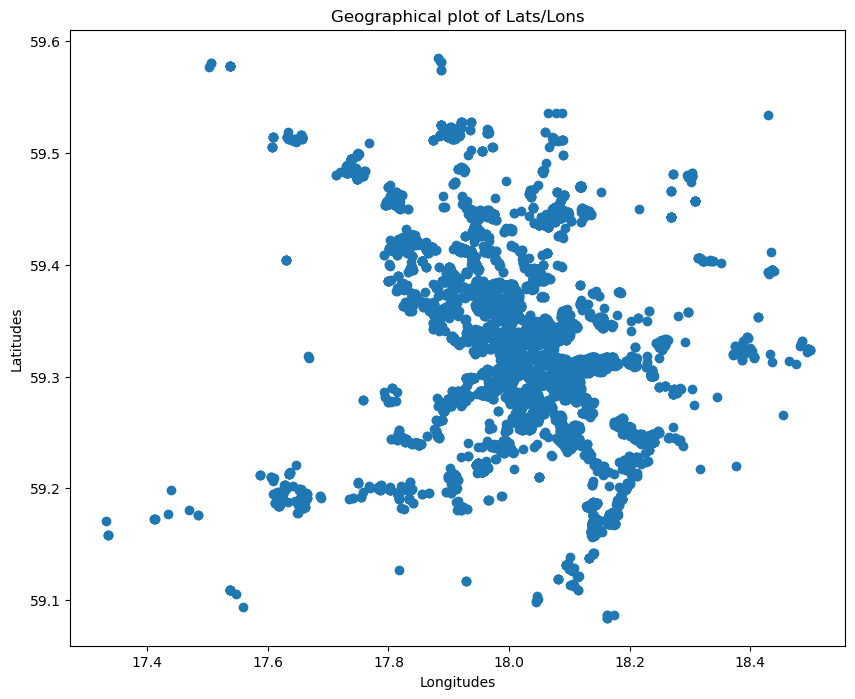

In [199]:
plt.figure(figsize=(10,8))#Figure size
plt.scatter('Longitude','Latitude',data=result_df)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

In [202]:
import plotly.express as px
# Create a scatter plot on a map using Plotly Express
fig = px.scatter_mapbox(result_df, lat='Latitude', lon='Longitude',
                        hover_name= 'District',
                        color='Amt per m²',
                        size='Price',
                        zoom=10, height=600)

# Update the map style
fig.update_layout( mapbox_style="open-street-map")

# Show the plot
fig.show()

In [196]:
import plotly.express as px
# Create a scatter plot on a map using Plotly Express
fig = px.scatter_mapbox(result_df, lat='Latitude', lon='Longitude',
                        hover_name= 'Municipality',
                        color='Amt per m²',
                        size='Price',
                        zoom=10, height=600)

# Update the map style
fig.update_layout( mapbox_style="open-street-map")

# Show the plot
fig.show()

As shown in the plots and as expected, apartments with highest price and price per m² were in Ostermalm and surrounding areas.

In [201]:
# Save the cleaned analyzed dataset as a csv or excel file for further visualization in Tableau and Ml price prediction
#For tableau visualization
result_df.to_csv('result_ml.csv',index=False)